In [2]:


import numpy as np
import os
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_boston
import matplotlib
import matplotlib.pyplot as plt
from xgboost import plot_importance,plot_tree
import xgboost as xgb

1.基于sklearn的接口 实现分类

In [3]:
iris = load_iris()
X,y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=960411)
feature_name = iris.feature_names

In [4]:
model = xgb.XGBClassifier(max_depth=5,
                          n_estimators=50,
                          silent=True,
                          objective='multi:softmax',
                          feature_names = feature_name,
                          )
model.fit(X_train,y_train)

[20:01:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { feature_names, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              feature_names=['sepal length (cm)', 'sepal width (cm)',
                             'petal length (cm)', 'petal width (cm)'],
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, silent=True,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [5]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('准确率为：%.2f%%'%(accuracy*100.0))

准确率为：96.67%


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

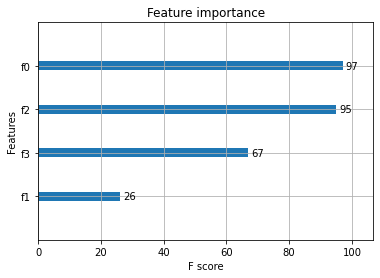

In [6]:
plot_importance(model)



<AxesSubplot:>

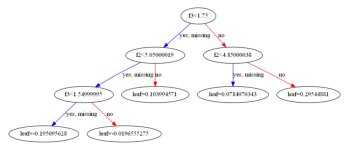

In [7]:
plot_tree(model,num_trees=5)


2.基于sklearn的接口实现回归

In [8]:
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [9]:
model = xgb.XGBRegressor(max_depth=5,learning_rate=0.1,
                         n_estimators=50,silent=True,objective='reg:gamma')
model.fit(X_train,y_train)

[20:05:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=0, num_parallel_tree=1,
             objective='reg:gamma', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=None, silent=True, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

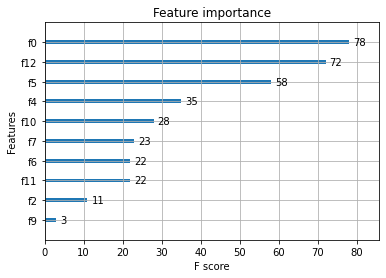

In [10]:
y_pred = model.predict(X_test)
plot_importance(model)
plt.show()

<AxesSubplot:>

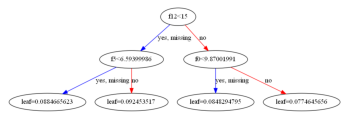

In [11]:
plot_tree(model,num_trees=17)